<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/projeto6_3/ProjetoTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [Marcius D. Moraes](https://github.com/marciusdm)*  

---

# Previsão de demanda
Neste projeto será abordado um método para prever a demanda por vinhos com base em um histórico de vendas anterior. Para isso será utilizada a biblioteca *Prophet*, criada pela equipe de desenvolvimento do Facebook.

<center>
<img src="https://github.com/marciusdm/dsnp/blob/main/assets/projeto6_3/despejando-vinho-tinto-no-copo.jpg?raw=true"><br>
<a href="https://br.freepik.com/fotos-gratis/despejando-vinho-tinto-no-copo_22243350.htm#query=vinho&position=5&from_view=search&track=sph">Imagem de fabrikasimf</a> no Freepik
</center>



## 1. O contexto do projeto
Já foi dito que “dados são o novo petróleo”, devido ao fato de que as empresas que souberem tirar proveito da enorme quantidade de dados que são produzidos a cada dia, terão grandes vantagens competitivas sobre as demais. Nesse contexto, a Ciência de Dados é uma área em franco crescimento que fornece ferramentas preciosas para transformar informações aparentemente desconexas em oportunidades de negócio.   
Um exemplo de como a Ciência de Dados pode ajudar empresas a reduzir custos e aumentar lucros consiste no uso de ferramentas para prever o comportamento de dados futuros com base em um histórico de dados produzido ao longo do tempo.  
É o que será utilizado neste projeto, com o intuito de auxiliar uma loja de vinhos a fazer um planejamento estratégico através de um modelo preditivo de demanda por vinhos.  Este modelo irá se basear nas vendas ao longo de três anos, de janeiro de 2018 a dezembro de 2020 para tentarmos prever o que será vendido  após este período.  
Se antecipar às tendências de compras por parte dos clientes traz muitos benefícios ao negócio pois permite entre outras coisas:
* Fazer um planejamento orçamentário mais eficaz, pelo fato de que ao saber o que os cientes vão consumir a empresa consegue estimar de modo mais preciso os custos de aquisição dos produtos que serão ofertados aos clientes;
* Gerenciar melhor os estoques de bebidas, na medida em que se evita manter por muito tempo produtos com pouca saída e dar prioridade para os produtos mais vendidos. Junte-se a isso, o fato de que alguns tipos de vinho são mais delicados e não podem ficar armazenados por muito tempo antes que comecem a ter uma degradação;
* Aumentar o poder de barganha junto aos fornecedores, em particular, nas bebidas mais vendidas, pois ao comprar mais unidades destas, a empresa pode negociar descontos melhores.
* Sinalizar aos produtores de vinho, que tipo de bebida deve ser mais ou menos fabricada de acordo com as perspectivas de demanda por parte dos consumidores.




## 2. Obtendo os dados
Diferentemente de outros projetos vistos até então, este contará com duas fontes de dados em vez de uma. A primeira delas é um catálogo de vinhos, com dados reais de vinhos e safras obtidos de uma loja de e-commerce de vinhos. A segunda é de um histórico de vendas obtido na plataforma Kaggle, que sofreu modificações para coincidir com a carta de vinhos original. Além disso, os dados originais continham registros de 5 anos de vendas, mas tiveram registros alterados para abranger somente o período de janeiro de 2018 a dezembro de 2020.     
Como é de praxe, primeiramente será feita a instalação de importação de pacotes necessários para este projeto. A seguir, os dados serão importados para estruturas de Dataframe da biblioteca Pandas.


In [1]:
## Como pretendo criar uma versão em inglês para este notebook, vou colocar todas as strings neste bloco
DF_PROD_SHAPE  = "O dataset de produtos contém {} linhas e {} colunas"
DF_SALES_SHAPE = "O dataset de vendas contém {} linhas e {} colunas"
VT_MOST_RECENT = "Safra mais recente: {}"
VT_MOST_ANCIENT = "Safra mais antiga: {}"
BP_PRICE_TITLE = "Valor em R$"
PRICE_MOST_EXPENSIVE = "O vinho mais caro custa R${:.2f}"
PRICE_CHEAPEST = "O vinho mais barato custa R${:.2f}"
PRICE_MEAN = "A média dos preços dos vinhos é R${:.2f}"
CHART_VINTAGE_TITLE = "Distribuição de vinhos por safra"
CHART_REGION_TITLE = "Distribuição de vinhos por região"
CHART_SBQ_TITLE = "Volume de vendas por trimestre em milhões de unidades"
CHART_RBQ_TITLE = "Receita líquida por trimestre em milhões de reais"
TOP_PROD_SALES = "Vinhos mais vendidos em volume de vendas"
TOP_PROD_REVENUE = "Vinhos mais vendidos em receita"
TOP_PROD_VINTAGE_SALES = "Vinhos mais vendidos em volume de vendas - produto e safra"
TOP_PROD_VINTAGE_REVENUE = "Vinhos mais vendidos em receita - produto e safra"
TOP_PRODUCER_SALES = "Volume de vendas por produtor"
TOP_PRODUCER_REVENUE = "Receita por produtor"
TOP_REGION_SALES = "Volume de vendas por região"
TOP_REGION_REVENUE = "Receita por região"
LBL_PRODUCT = "Nome"
LBL_PRODUCER = "Produtor"
LBL_REGION = "Região"
LBL_TOTAL_SALES = "Total de vendas"
LBL_PREDICTED = "Previsto"

In [2]:
#Definindo esquemas de cores
wine_cp = "dark:salmon_r" #paleta de cores p/ ranking de vinhos

In [3]:
!pip install pandas_profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires py

In [4]:
#instalando o pacote ipywidgets
!pip install ipywidgets -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00


In [5]:
# importando o Prophet
from prophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import ydata_profiling as pf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from google.colab import data_table
from textwrap import wrap
from ipywidgets import interact, fixed

In [7]:
pd.set_option("display.max_rows", 100)
plt.style.use('ggplot')

In [8]:
src_prod="https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv"
df = pd.read_csv(src_prod)
print(DF_PROD_SHAPE.format(df.shape[0], df.shape[1]))
df.head()

O dataset de produtos contém 219 linhas e 9 colunas


item_id                                          name     producer country  \
0        1              Philipponnat Royale Reserve Brut  Philipponat  France   
1        2              Philipponnat Royale Reserve Rosé  Philipponat  France   
2        3  Philipponnat Cuvée 1522 Grand Cru Extra Brut  Philipponat  France   
3        4          Philipponnat Cuvée 1522 1er Cru Rosé  Philipponat  France   
4        5            Philipponnat Clos Des Goisses Brut  Philipponat  France   

      region vintage            kind price_brl price_usd  
0  Champagne      NV       sparkling    339.60     58.75  
1  Champagne      NV  rose sparkling    489.00     84.60  
2  Champagne    2009       sparkling    789.00    136.51  
3  Champagne    2008  rose sparkling    899.40    155.61  
4  Champagne    2009       sparkling  1,548.00    267.82

## 3. Analisando o conjunto de dados de produtos


### 3.1 Dicionário de dados
O conjunto de dados de vendas apresenta as colunas a seguir:
* **item_id**: identificador único do vinho;
* **name**: nome do vinho;
* **producer**: produtor;
* **country**: país de origem;
* **region**: região de origem;
* **kind**: tipo de vinho (ver abaixo);
* **price_brl**: Preço em reais;
* **price_usd**: preço em dólar;

Os tipos de vinho:
* **sparkling**: espumante;
* **rose sparkling**: espumante rosé
* **white**: branco
* **rose**: rosé
* **red**: tinto


### 3.2 Verificando os tipos de dados das colunas

In [ ]:
df.dtypes

item_id       int64
name         object
producer     object
country      object
region       object
vintage      object
kind         object
price_brl    object
price_usd    object
dtype: object

### 3.3 Efetuando um tratamento nos dados
O Pandas trata todas as colunas, com exceção de `item_id` como texto, mesmo as que deveriam ser numéricas: `price_brl` e `price_usd`. O problema é a existência de vírgulas em algumas registros. Será necessário eliminá-las


In [9]:
# limpando as vírgulas
df.replace(',','', regex=True, inplace=True)
df.head()

item_id                                          name     producer country  \
0        1              Philipponnat Royale Reserve Brut  Philipponat  France   
1        2              Philipponnat Royale Reserve Rosé  Philipponat  France   
2        3  Philipponnat Cuvée 1522 Grand Cru Extra Brut  Philipponat  France   
3        4          Philipponnat Cuvée 1522 1er Cru Rosé  Philipponat  France   
4        5            Philipponnat Clos Des Goisses Brut  Philipponat  France   

      region vintage            kind price_brl price_usd  
0  Champagne      NV       sparkling    339.60     58.75  
1  Champagne      NV  rose sparkling    489.00     84.60  
2  Champagne    2009       sparkling    789.00    136.51  
3  Champagne    2008  rose sparkling    899.40    155.61  
4  Champagne    2009       sparkling   1548.00    267.82

Antes de iniciar a análise exploratória, será feito um tratamento nas colunas `price_brl`e `price_usd` para convertê-las em numéricas. Também será feito um tratamento na coluna `vintage` para converter os valores `NV` (sem safra) para 0, e assim também transformá-la em uma coluna numérica.

In [10]:
def get_iso_code(country):
	if country == 'France':
		return "FR"
	elif country == 'Italy':
		return "IT"
	elif country == 'Spain':
		return "ES"
	elif country == 'Portugal':
		return "PT"
	elif country == 'Chile':
		return "CH"
	elif country == 'Argentina':
		return "AR"

#Função para combinar o nome do vinho com sua safra
def get_name_vintage(name, vintage):
	if(vintage == 0): return name
	else: return "{} {}".format(name, str(vintage))

In [11]:
df.price_brl = pd.to_numeric(df.price_brl)
df.price_usd = pd.to_numeric(df.price_usd)
df['vintage'] = df['vintage'].apply(lambda x:  0 if(x=='NV') else int(x) )
df["name_vintage"] = df.apply(lambda d: get_name_vintage(d["name"], d.vintage), axis=1)
df["region"] = df.apply(lambda d: "{} ({})".format(d.region, get_iso_code(d.country)) , axis=1 )

In [ ]:
df.head()

item_id                                          name     producer country  \
0        1              Philipponnat Royale Reserve Brut  Philipponat  France   
1        2              Philipponnat Royale Reserve Rosé  Philipponat  France   
2        3  Philipponnat Cuvée 1522 Grand Cru Extra Brut  Philipponat  France   
3        4          Philipponnat Cuvée 1522 1er Cru Rosé  Philipponat  France   
4        5            Philipponnat Clos Des Goisses Brut  Philipponat  France   

           region  vintage            kind  price_brl  price_usd  \
0  Champagne (FR)        0       sparkling      339.6      58.75   
1  Champagne (FR)        0  rose sparkling      489.0      84.60   
2  Champagne (FR)     2009       sparkling      789.0     136.51   
3  Champagne (FR)     2008  rose sparkling      899.4     155.61   
4  Champagne (FR)     2009       sparkling     1548.0     267.82   

                                        name_vintage  
0                   Philipponnat Royale Reserve Brut  
1                   Philipponnat Royale Reserve Rosé  
2  Philipponnat Cuvée 1522 Grand Cru Extra Brut 2009  
3          Philipponnat Cuvée 1522 1er Cru Rosé 2008  
4            Philipponnat Clos Des Goisses Brut 2009

In [ ]:
#Verificando novamente o tipo de dados
df.dtypes

item_id           int64
name             object
producer         object
country          object
region           object
vintage           int64
kind             object
price_brl       float64
price_usd       float64
name_vintage     object
dtype: object

### 3.4 Extraindo um relatório dos dados
Utilizando a ferramenta Pandas Profiling para extrair um relatório detalhado dos dados deste conjunto.
Obs.:
A coluna item_id será removida pois não é relevante para a nossa análise. Também vamos remover a coluna `vintage`, pois a existência de um valor 0 prejudica a visualização da distribuição de vinhos por safra. Então será plotado em gráfico em separado para esta coluna



In [ ]:
pf.ProfileReport(df[["name_vintage", "producer", "country", "region", "vintage", "kind", "price_brl"]], duplicates=None, correlations=None, interactions=None)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.5 Mais algumas tabelas e gráficos

Vamos tentar tirar mais alguns insights a partir dos dados da carta de vinhos que temos disponível. Para isso, vamos adicionais mais alguns elementos visuais.
* **Distribuiçao vinhos por região e produtor**

Vams agora criar tabelas interativos que permitem ao usuário filtrar os dados por determinada região ou produtor.

In [12]:
def filter_producer(producer,grid):
  #data_table.DataTable(grid[grid.producer==p], include_index=False, num_rows_per_page=10)
  display(grid.loc[grid.producer==producer, ["name_vintage", "vintage", "country", "region", "kind", "price_brl","price_usd"]].sort_values(by="name_vintage"))

def filter_region(region, grid):
  #data_table.DataTable(grid[grid.region==r], include_index=False, num_rows_per_page=10)
  display(grid.loc[grid.region==region,["name_vintage", "vintage", "producer", "kind", "price_brl","price_usd"]].sort_values(by=["producer","name_vintage"]))


In [13]:
interact(filter_producer, producer=np.sort(df.producer.unique()), grid=fixed(df) )

interactive(children=(Dropdown(description='producer', options=('Aalto', 'Achaval Ferrer', 'Agrapart', 'Antoin…

<function __main__.filter_producer(producer, grid)>

In [14]:
interact(filter_region, region=np.sort(df.region.unique()), grid=fixed(df) )

interactive(children=(Dropdown(description='region', options=('Alentejo (PT)', 'Alsace (FR)', 'Bordeaux (FR)',…

<function __main__.filter_region(region, grid)>

Safra mais recente: 2019
Safra mais antiga: 2002


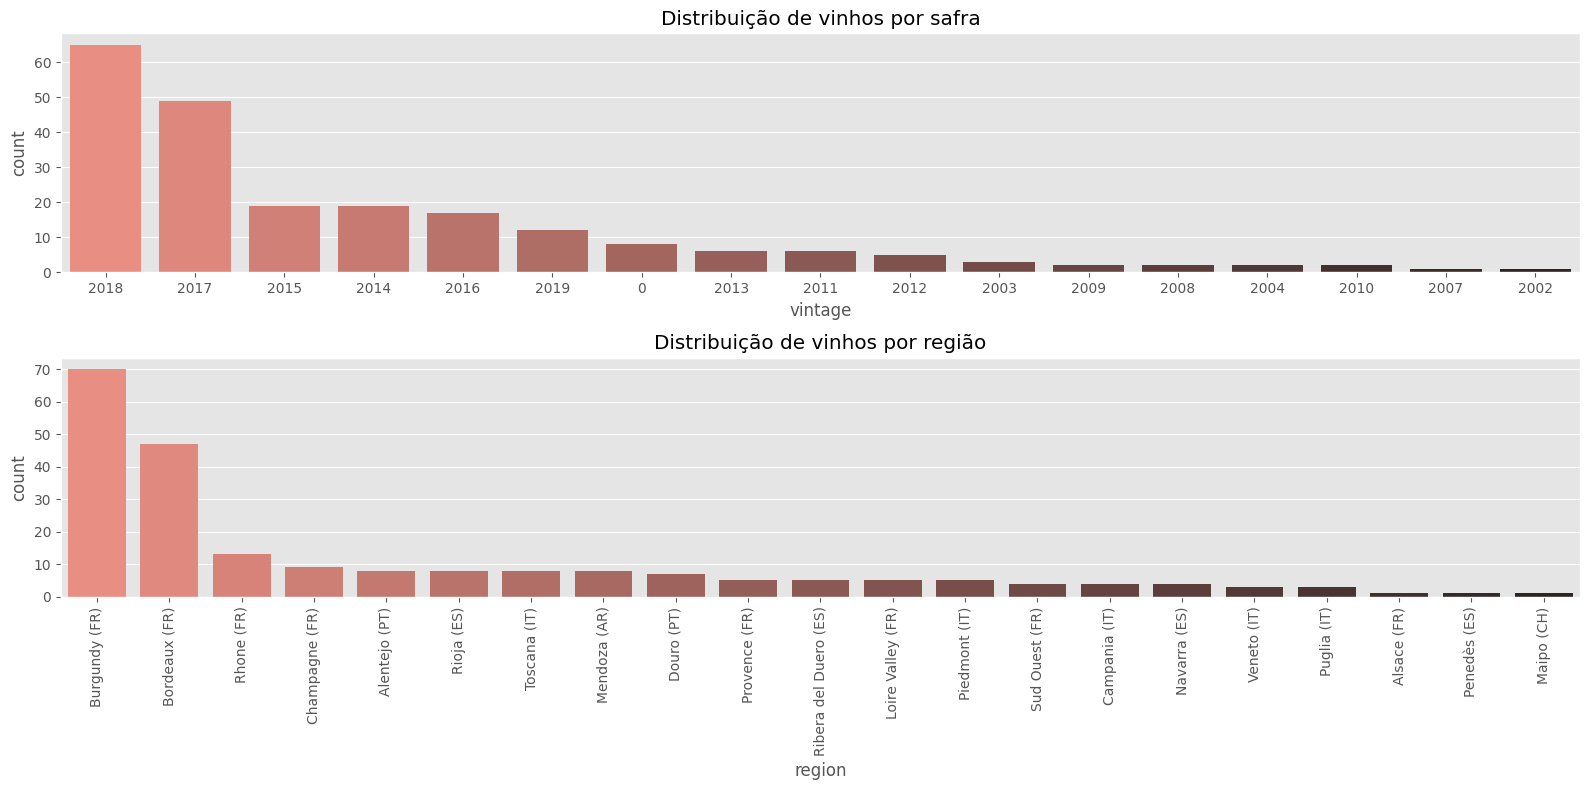

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1,figsize=(16, 8))
print(VT_MOST_RECENT.format(df.vintage.max()))
print(VT_MOST_ANCIENT.format(df[df.vintage != 0].vintage.min()))
sns.countplot(x=df.vintage, order=df.vintage.value_counts().index, ax=ax[0], palette=wine_cp);
ax[0].set_title(CHART_VINTAGE_TITLE)

sns.countplot(x=df.region, order=df.region.value_counts().index, ax=ax[1], palette=wine_cp);
ax[1].set_title(CHART_REGION_TITLE)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show();


Como existem vinhos com preços muito mais caros, eliminaremos os valores mais extremos e plotar novamente um histograma para a coluna `price_brl`


<Axes: >

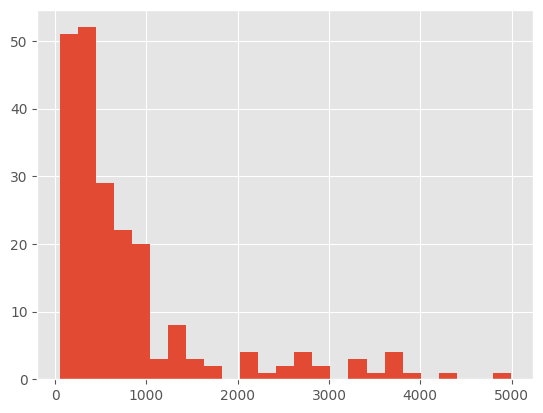

In [ ]:
df[df.price_brl < 5000].price_brl.hist(bins=25)

A maioria dos vinhos custa até 600 reais, e alguns poucos custam mais de 3000 reais. A média de preços está em torno de 967 reais. Metade dos produtos custa até 510 reais. Um quarto deles custa até 264 reais, e 75% deles custam até 949 reais. Para visualizar melhor estas informações, iremos plotar um box-plot. Os outiliers não serão mostrados pois alguns deles possuem valores muito acima do 3º quartil, e seria gerado um box plot muito estreito

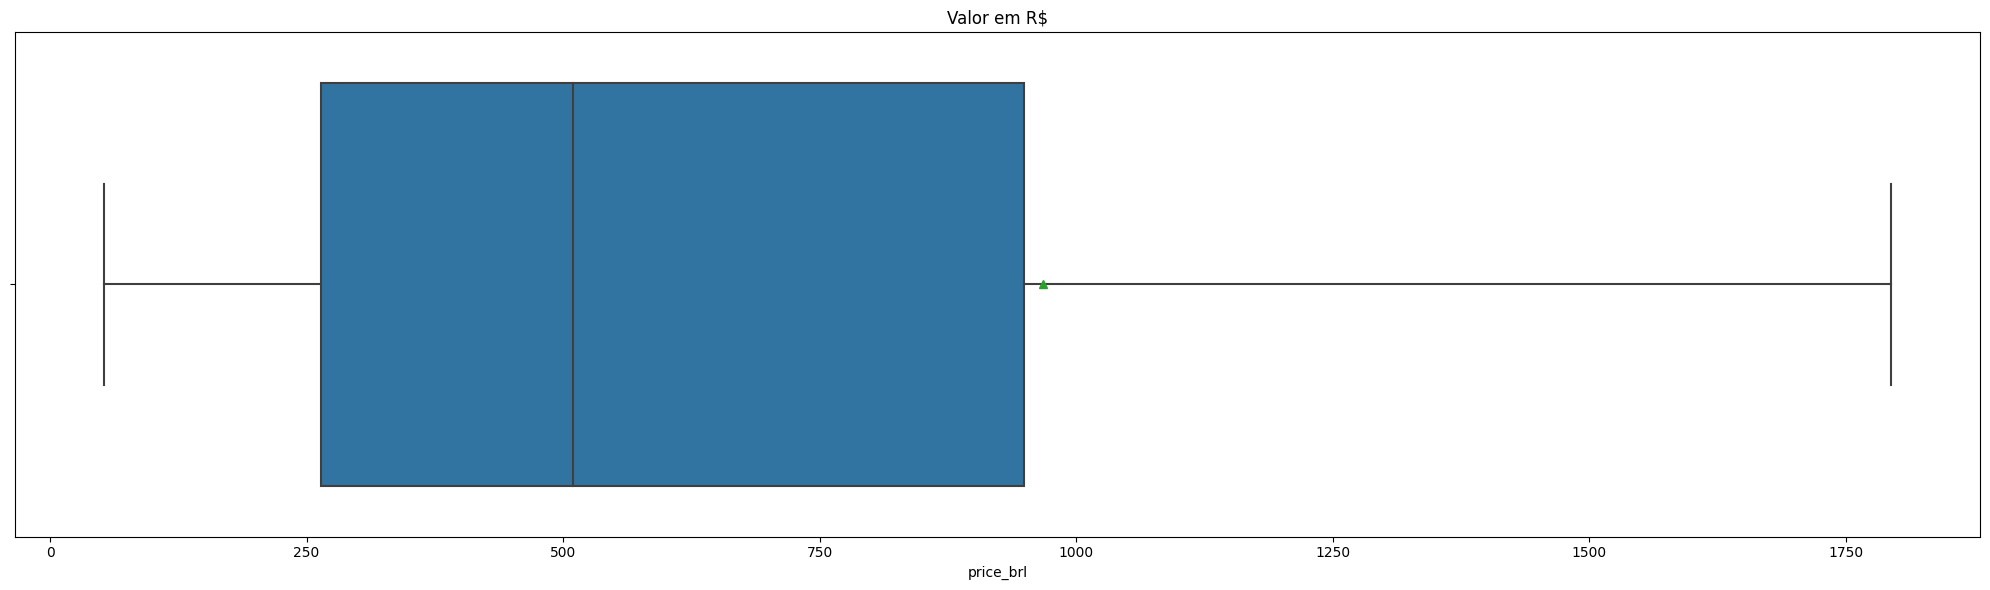

In [ ]:
fig, ax = plt.subplots(sharex=True,figsize=(20,6)) #figsize=(12,10)


sns.boxplot(x=df.price_brl, showmeans=True, ax=ax,showfliers=False)
ax.set_title(BP_PRICE_TITLE)
plt.tight_layout()
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: 'R${:,.0f}'.format(x)))
#ax.set_xlabel("Cancelamento")



Mais alguns dados a respeito do preço dos vinhos

In [ ]:
most_expensive = df.price_brl.max()
cheapest = df.price_brl.min()
print(PRICE_MOST_EXPENSIVE.format(most_expensive)) #Vinho mais caro
print(PRICE_CHEAPEST.format(cheapest)) #Vinho mais barato
print(PRICE_MEAN.format(df.price_brl.mean())) #Média de preços


O vinho mais caro custa R$10992.00
O vinho mais barato custa R$52.80
A média dos preços dos vinhos é R$967.62


In [ ]:
#Exibindo o vinho mais barato
df[df.price_brl == cheapest]

item_id                                               name      producer  \
177      178  Cava Juvé & Camps Cinta Purpura Reserva Brut -...  Juvé & Camps   

    country        region  vintage       kind  price_brl  price_usd  \
177   Spain  Penedès (ES)        0  sparkling       52.8       9.13   

                                          name_vintage  
177  Cava Juvé & Camps Cinta Purpura Reserva Brut -...

In [ ]:
#Exibindo o vinho mais caro
df[df.price_brl == most_expensive]

item_id                                               name  \
93       94  Domaine Ponsot Clos de La Roche Grand Cru Cuve...   

          producer country         region  vintage kind  price_brl  price_usd  \
93  Domaine Ponsot  France  Burgundy (FR)     2017  red    10992.0    1901.73   

                                         name_vintage  
93  Domaine Ponsot Clos de La Roche Grand Cru Cuve...

* Produtores de vinho.  
Verificando os produtores da carta de vinhos

In [ ]:
df.producer.value_counts()

Domaine Ponsot                                    12
La Chablisienne                                   10
Domaine Matrot                                     9
Achaval Ferrer                                     8
Pêra-Grave                                         8
Olivier Riviere                                    8
Casanova di Neri                                   8
Eric Texier                                        7
Domaine Pascal Prunier-Bonheur                     7
Domaine Tessier                                    5
Luis Seabra Vinhos                                 5
Aalto                                              5
Sandrone                                           5
Domaine de Fontbonau                               5
Philipponat                                        5
Domaine Michel Niellon                             5
Domaine Alain Chavy                                5
Chateau Pavie                                      4
Agrapart                                      

* Consultando os produtos com mais de uma safra disponível:

In [ ]:
df.name.value_counts().loc[lambda x: x >1 ]

Domaine Ponsot Chapelle-Chambertin Grand Cru                       4
Potensac                                                           3
Luciano Sandrone Barolo Le Vigne                                   2
Domaine Ponsot Clos de La Roche Grand Cru Cuvee Vieilles Vignes    2
Château Pavie                                                      2
Duroche Pierre & Mariannne Echezeaux Grand Cru                     2
La Lence de Domaine de Fontbonau                                   2
Olivier Riviere Ganko                                              2
Domaine de Fontbonau                                               2
Domaine Matrot Meursault 1er Cru Blagny                            2
Domaine Matrot Meursault 1er Cru Charmes                           2
Domaine Hudelot-Noellat Bourgogne Passetoutgrain                   2
Villa Diamante Fiano di Avellino Vigna Della Congregazione         2
Luciano Sandrone Barolo Aleste                                     2
Villa Diamante Fiano di Avellino C

* Mais algumas consultas gerais:

In [ ]:
print("Existem {} vinhos disponíveis".format(df.name.unique().size))
print("Quantidade de Produtores na carta de vinhos: ", (len(df.producer.value_counts())))
print("Quantidade de Países na carta de vinhos: ", (len(df.country.value_counts())))
print("Quantidade de Safras na carta de vinhos: ", (len(df.vintage.value_counts())),"\n")



Existem 188 vinhos disponíveis
Quantidade de Produtores na carta de vinhos:  58
Quantidade de Países na carta de vinhos:  6
Quantidade de Safras na carta de vinhos:  17 



## 4. Dados de venda
Agora será feita a análise dos dados de venda dos vinhos
## 4.1 Buscando os dados


In [15]:
# dados de vendas
store = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv')

import datetime as dt


Vamos agora analisar os primeiros e últimos registros com o intuito de determinar o período em que estas vendas ocorreram

In [16]:
store.head()

date  store  item  sales
0  2018-01-01      1     1     13
1  2018-01-02      1     1     11
2  2018-01-03      1     1     14
3  2018-01-04      1     1     13
4  2018-01-05      1     1     10

In [ ]:
store.tail()

date  store  item  sales
720066  12/27/2020      3   219     71
720067  12/28/2020      3   219     28
720068  12/29/2020      3   219     75
720069  12/30/2020      3   219    135
720070  12/31/2020      3   219     91

Como se pode notar, o registro de vendas vai de 1º de janeiro de 2018 a 31 de dezembro de 2020

In [ ]:
store.dtypes

date       object
store       int64
item_id    object
sales       int64
dtype: object

### 4.2 Efetuando tratamento nos dados
Antes de continuar, faremos algumas transformações nos dados. Primeiramente juntaremos os dois conjuntos de dados, o de produto e o de vendas, e a seguir, transforemos a coluna `date` em datas

In [17]:
# dados de vendas
store.rename(columns= {'item': 'item_id'}, inplace=True)
store.item_id = store.item_id.astype(np.int64)

store = df.merge(store, on='item_id', how='right')

store['date'] = pd.to_datetime(store['date'])

print(store.shape)
store.head()

(720071, 13)


item_id                              name     producer country  \
0        1  Philipponnat Royale Reserve Brut  Philipponat  France   
1        1  Philipponnat Royale Reserve Brut  Philipponat  France   
2        1  Philipponnat Royale Reserve Brut  Philipponat  France   
3        1  Philipponnat Royale Reserve Brut  Philipponat  France   
4        1  Philipponnat Royale Reserve Brut  Philipponat  France   

           region  vintage       kind  price_brl  price_usd  \
0  Champagne (FR)        0  sparkling      339.6      58.75   
1  Champagne (FR)        0  sparkling      339.6      58.75   
2  Champagne (FR)        0  sparkling      339.6      58.75   
3  Champagne (FR)        0  sparkling      339.6      58.75   
4  Champagne (FR)        0  sparkling      339.6      58.75   

                       name_vintage       date  store  sales  
0  Philipponnat Royale Reserve Brut 2018-01-01      1     13  
1  Philipponnat Royale Reserve Brut 2018-01-02      1     11  
2  Philipponnat Royale Reserve Brut 2018-01-03      1     14  
3  Philipponnat Royale Reserve Brut 2018-01-04      1     13  
4  Philipponnat Royale Reserve Brut 2018-01-05      1     10

In [ ]:
store[store.date == "2020-12-31"].tail()

item_id                                            name  \
715686      218                    Achaval-Ferrer Finca Mirador   
716782      218                    Achaval-Ferrer Finca Mirador   
717878      219  Achaval-Ferrer Blend De Fincas Edição Limitada   
718974      219  Achaval-Ferrer Blend De Fincas Edição Limitada   
720070      219  Achaval-Ferrer Blend De Fincas Edição Limitada   

              producer    country        region  vintage kind  price_brl  \
715686  Achaval Ferrer  Argentina  Mendoza (AR)     2014  red      599.4   
716782  Achaval Ferrer  Argentina  Mendoza (AR)     2014  red      599.4   
717878  Achaval Ferrer  Argentina  Mendoza (AR)     2014  red      999.0   
718974  Achaval Ferrer  Argentina  Mendoza (AR)     2014  red      999.0   
720070  Achaval Ferrer  Argentina  Mendoza (AR)     2014  red      999.0   

        price_usd                                       name_vintage  ...  \
715686     103.70                  Achaval-Ferrer Finca Mirador 2014  ...   
716782     103.70                  Achaval-Ferrer Finca Mirador 2014  ...   
717878     172.84  Achaval-Ferrer Blend De Fincas Edição Limitada...  ...   
718974     172.84  Achaval-Ferrer Blend De Fincas Edição Limitada...  ...   
720070     172.84  Achaval-Ferrer Blend De Fincas Edição Limitada...  ...   

       sales  sale_value_brl  Year  Quarter  Month  Week  Weekday  Day  \
715686    12          7192.8  2020        4     12    53        3   31   
716782    27         16183.8  2020        4     12    53        3   31   
717878    93         92907.0  2020        4     12    53        3   31   
718974   107        106893.0  2020        4     12    53        3   31   
720070    91         90909.0  2020        4     12    53        3   31   

        Dayofyear  Year_Quarter  
715686        366       2020 Q4  
716782        366       2020 Q4  
717878        366       2020 Q4  
718974        366       2020 Q4  
720070        366       2020 Q4  

[5 rows x 22 columns]

Também iremos adcionar algumas colunas com o intuito de melhorar nossa análise

In [18]:

store["sale_value_brl"] = store.price_brl * store.sales #Valor das vendas = valor unitário x qtde vendida
store["Year"] = store.date.apply(lambda x: x.year) #Ano
store["Quarter"] = store.date.apply(lambda x: x.quarter) #trimestre
store["Month"] = store.date.apply(lambda x: x.month) #mês
store["Week"] = store.date.apply(lambda x: x.week) #semana
store["Weekday"] = store.date.apply(lambda x: x.weekday()) #dia da semana
store["Day"] = store.date.apply(lambda x: x.day) #dia
store["Dayofyear"] = store.date.apply(lambda x: x.dayofyear) #dia do ano
store.drop(store[store.Year == 2016].index, axis=0, inplace=True) #Removendo registros de 2016, que não são relevantes p/ nossa análise
store.head()

item_id                              name     producer country  \
0        1  Philipponnat Royale Reserve Brut  Philipponat  France   
1        1  Philipponnat Royale Reserve Brut  Philipponat  France   
2        1  Philipponnat Royale Reserve Brut  Philipponat  France   
3        1  Philipponnat Royale Reserve Brut  Philipponat  France   
4        1  Philipponnat Royale Reserve Brut  Philipponat  France   

           region  vintage       kind  price_brl  price_usd  \
0  Champagne (FR)        0  sparkling      339.6      58.75   
1  Champagne (FR)        0  sparkling      339.6      58.75   
2  Champagne (FR)        0  sparkling      339.6      58.75   
3  Champagne (FR)        0  sparkling      339.6      58.75   
4  Champagne (FR)        0  sparkling      339.6      58.75   

                       name_vintage  ... store  sales  sale_value_brl  Year  \
0  Philipponnat Royale Reserve Brut  ...     1     13          4414.8  2018   
1  Philipponnat Royale Reserve Brut  ...     1     11          3735.6  2018   
2  Philipponnat Royale Reserve Brut  ...     1     14          4754.4  2018   
3  Philipponnat Royale Reserve Brut  ...     1     13          4414.8  2018   
4  Philipponnat Royale Reserve Brut  ...     1     10          3396.0  2018   

   Quarter  Month  Week  Weekday  Day  Dayofyear  
0        1      1     1        0    1          1  
1        1      1     1        1    2          2  
2        1      1     1        2    3          3  
3        1      1     1        3    4          4  
4        1      1     1        4    5          5  

[5 rows x 21 columns]

### 4.3. Análise exploratória
* Resumo estatístico das vendas

In [ ]:
round(store[["price_brl","price_usd","sales","sale_value_brl"]].describe(),2)

price_brl  price_usd      sales  sale_value_brl
count  720071.00  720071.00  720071.00       720071.00
mean      967.62     167.41      70.59        70149.23
std      1406.37     243.32      41.36       129170.30
min        52.80       9.13       1.00           52.80
25%       259.20      44.84      35.00        13018.50
50%       509.40      88.13      67.00        29193.00
75%       949.20     164.22     104.00        66033.00
max     10992.00    1901.73     196.00      1648800.00

* Evolução das vendas ao longo dos três anos por trimestre

In [19]:
store["Year_Quarter"] = store.apply(lambda d: "{} Q{}".format(d.Year, d.Quarter) , axis=1 )

store.head()

item_id                              name     producer country  \
0        1  Philipponnat Royale Reserve Brut  Philipponat  France   
1        1  Philipponnat Royale Reserve Brut  Philipponat  France   
2        1  Philipponnat Royale Reserve Brut  Philipponat  France   
3        1  Philipponnat Royale Reserve Brut  Philipponat  France   
4        1  Philipponnat Royale Reserve Brut  Philipponat  France   

           region  vintage       kind  price_brl  price_usd  \
0  Champagne (FR)        0  sparkling      339.6      58.75   
1  Champagne (FR)        0  sparkling      339.6      58.75   
2  Champagne (FR)        0  sparkling      339.6      58.75   
3  Champagne (FR)        0  sparkling      339.6      58.75   
4  Champagne (FR)        0  sparkling      339.6      58.75   

                       name_vintage  ... sales  sale_value_brl  Year  Quarter  \
0  Philipponnat Royale Reserve Brut  ...    13          4414.8  2018        1   
1  Philipponnat Royale Reserve Brut  ...    11          3735.6  2018        1   
2  Philipponnat Royale Reserve Brut  ...    14          4754.4  2018        1   
3  Philipponnat Royale Reserve Brut  ...    13          4414.8  2018        1   
4  Philipponnat Royale Reserve Brut  ...    10          3396.0  2018        1   

   Month  Week  Weekday  Day  Dayofyear  Year_Quarter  
0      1     1        0    1          1       2018 Q1  
1      1     1        1    2          2       2018 Q1  
2      1     1        2    3          3       2018 Q1  
3      1     1        3    4          4       2018 Q1  
4      1     1        4    5          5       2018 Q1  

[5 rows x 22 columns]

In [ ]:
store.dtypes

item_id                    int64
name                      object
producer                  object
country                   object
region                    object
vintage                    int64
kind                      object
price_brl                float64
price_usd                float64
date              datetime64[ns]
store                      int64
sales                      int64
sale_value_brl           float64
Year                       int64
Quarter                    int64
Month                      int64
Week                       int64
Weekday                    int64
Day                        int64
Dayofyear                  int64
trunc_name                object
amount_spent             float64
dtype: object

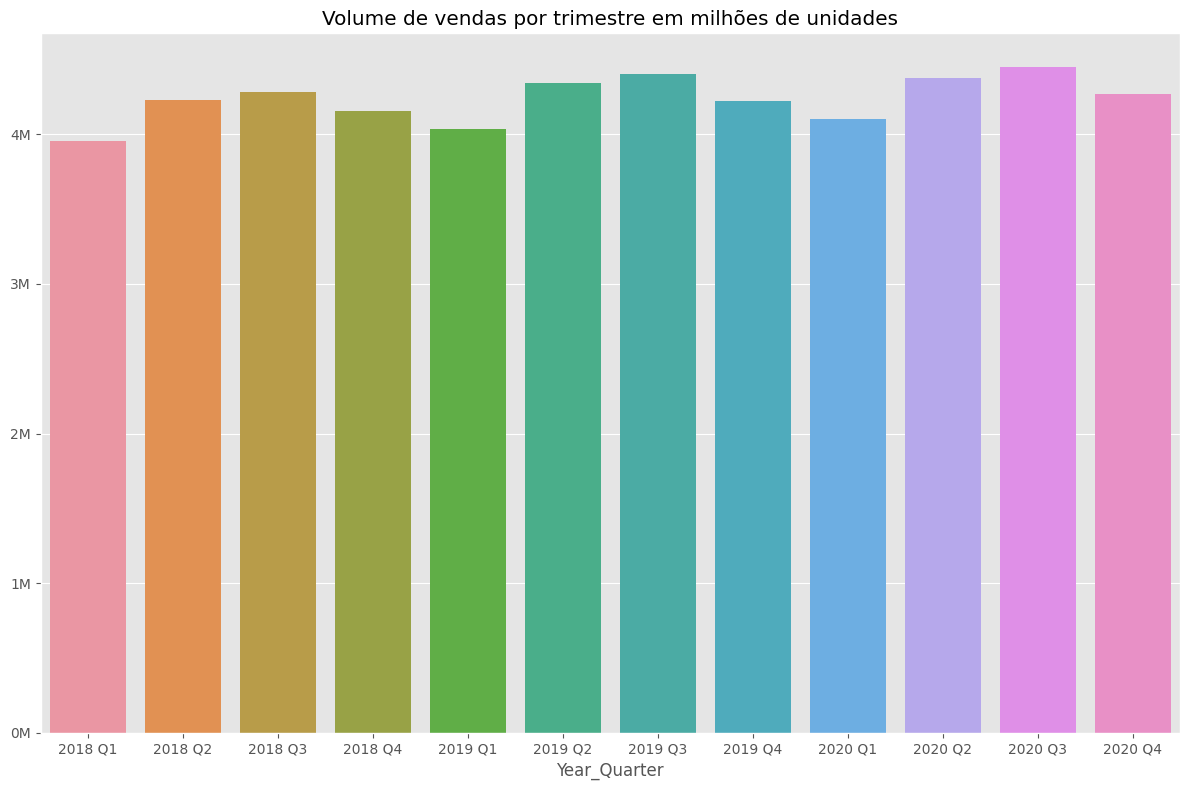

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sales_by_quarter = store.groupby("Year_Quarter")["sales"].sum()
ax.set_title(CHART_SBQ_TITLE)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

sns.barplot(x= sales_by_quarter.index,y=sales_by_quarter.values, ax=ax)
plt.tight_layout()

Interessante notar que nos três anos abrangidos por este conjunto de dados o volume de vendas por trimestre segue o mesmo padrão sendo o terceiro trimestre o que tem mais vendas, seguido pelo segundo, o quarto e, finalmente, o primeiro trimestre. Também para cada um dos trimestres, as vendas são em número suavemente maior que o período correspondente no ano anterior.
Além do quantidade de itens vendidos, vamos verificar também a receita obtida

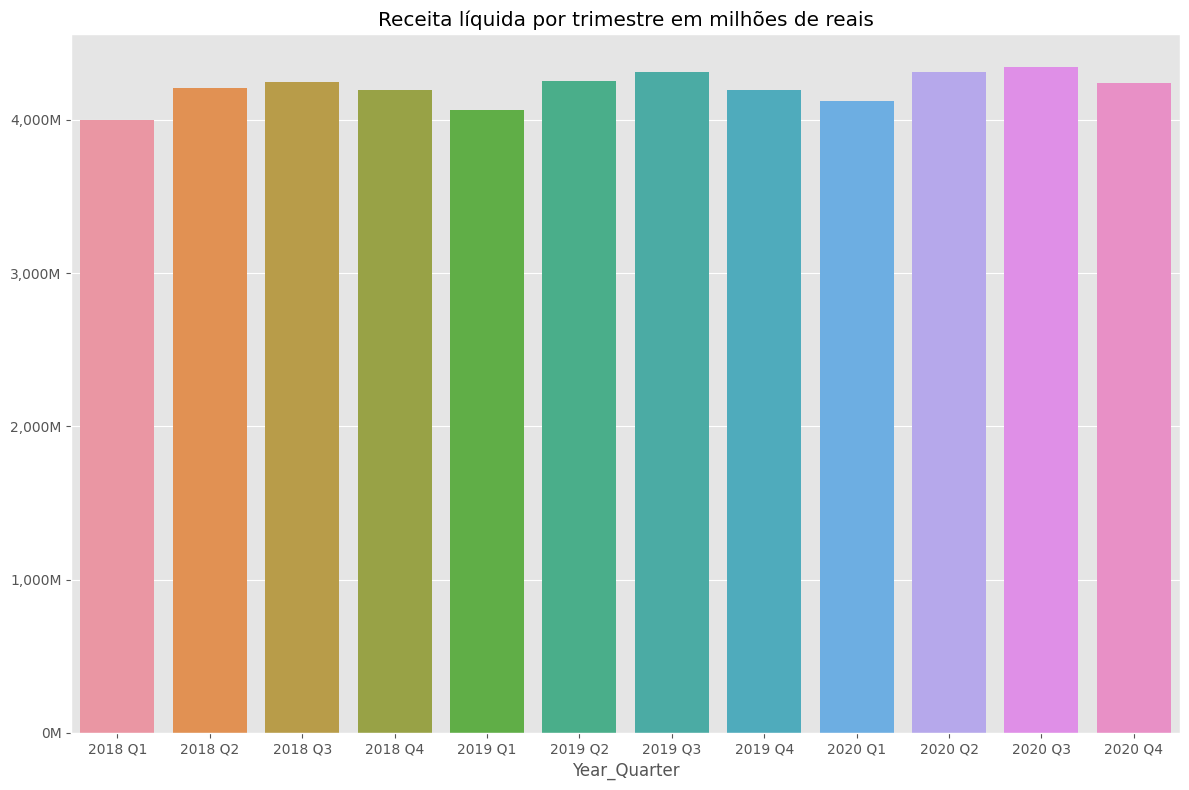

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
revenue_by_quarter = store.groupby("Year_Quarter")["sale_value_brl"].sum()
ax.set_title(CHART_RBQ_TITLE)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

sns.barplot(x= revenue_by_quarter.index,y=revenue_by_quarter.values, ax=ax)
plt.tight_layout()

Os gráficos acima mostram que a tendência é de crescimento, tanto em quantidade de vendas quanto em receita. Porém, resta analisar, quais os vinhos têm mais saída e quais os que geram mais receita, a fim de sinalizar a empresa quais marcas devem ter prioridade na aquisição junto a seus fornecedores.

In [ ]:
# Nomes de vinho muito longos serão truncados para não prejudicar a visualização do gráfico abaixo
wrap_label =  lambda lbl: '\n'.join(wrap(lbl, 40))
#lambda data: (data[:30] + ' (..) ') + data[data.rfind(' '):] if len(data) > 40 else data

def wrap_labels(labels):
  for label in labels:
    label.set_text(wrap_label(label.get_text()))
  return labels
#store["trunc_name"] = store.name.apply(lambda d: trunc(d) )



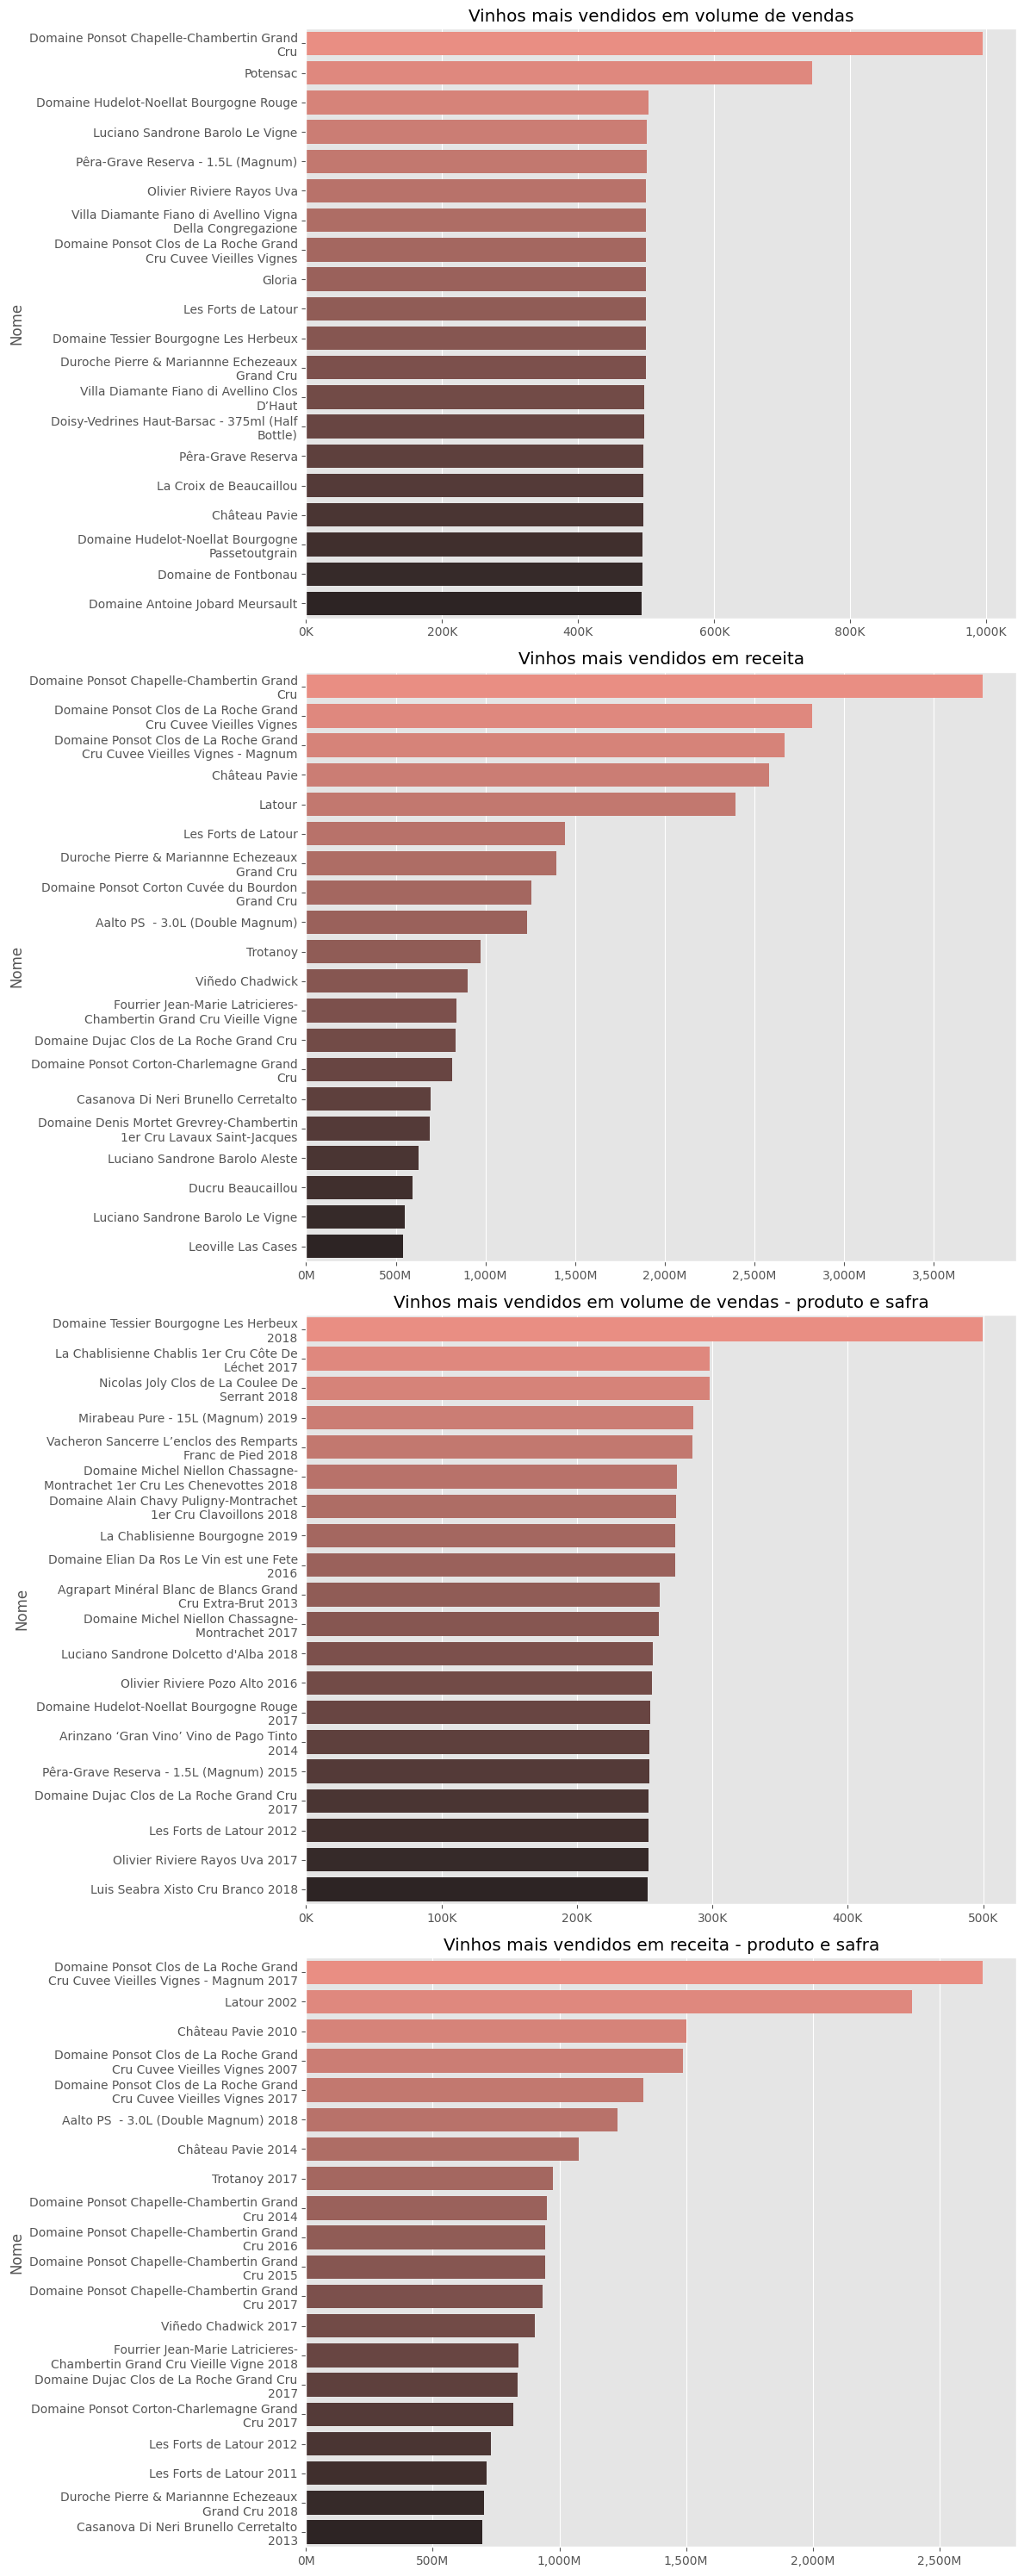

In [ ]:
sales_by_product = store.groupby("name")["sales"].sum().sort_values(ascending=False).iloc[0:20]
revenue_by_product = store.groupby("name")["sale_value_brl"].sum().sort_values(ascending=False).iloc[0:20]
sales_by_product_vintage = store.groupby("name_vintage")["sales"].sum().sort_values(ascending=False).iloc[0:20]
revenue_by_product_vintage = store.groupby("name_vintage")["sale_value_brl"].sum().sort_values(ascending=False).iloc[0:20]

fig, ax = plt.subplots(figsize=(12,30), nrows=4, ncols=1)
sns.barplot(y= sales_by_product.index,x=sales_by_product.values,orient="h", ax=ax[0], palette=wine_cp)
sns.barplot(y= revenue_by_product.index,x=revenue_by_product.values, orient="h", ax=ax[1], palette=wine_cp)
sns.barplot(y= sales_by_product_vintage.index,x=sales_by_product_vintage.values,orient="h", ax=ax[2], palette=wine_cp)
sns.barplot(y= revenue_by_product_vintage.index,x=revenue_by_product_vintage.values, orient="h", ax=ax[3], palette=wine_cp)

ax[0].set_title(TOP_PROD_SALES)
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax[0].set_ylabel(LBL_PRODUCT)
ax[0].set_yticklabels( wrap_labels(ax[0].get_yticklabels()))


ax[1].set_title(TOP_PROD_REVENUE)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_ylabel(LBL_PRODUCT)
ax[1].set_yticklabels( wrap_labels(ax[1].get_yticklabels()))


ax[2].set_title(TOP_PROD_VINTAGE_SALES)
ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax[2].set_ylabel(LBL_PRODUCT)
ax[2].set_yticklabels( wrap_labels(ax[2].get_yticklabels()))


ax[3].set_title(TOP_PROD_VINTAGE_REVENUE)
ax[3].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax[3].set_ylabel(LBL_PRODUCT)
ax[3].set_yticklabels( wrap_labels(ax[3].get_yticklabels()))

#ax[1].set_xticklabels( trunc_labels(ax[1].get_xticklabels()), rotation=90)
#plt.setp(ax[0].set_yticklabels(ax[0].get_xticklabels()))
#plt.setp(ax[1].set_yticklabels(ax[1].get_xticklabels()))

plt.tight_layout()

Temos algumas informações muito interessantes aqui. De fato, o vinho que mais gera receita (*Domaine Ponsot Chapelle-Chambertin Grand Cru*) é o que mais vende. Porém o segundo colocado em receita é apenas o oitavo colocado em vendas (*Domaine Ponsot Clos de La Roche Grand Cru Cuvee Vieilles Vignes*) é apenas o oitavo vinho mais vendido. Por outro lado, o segundo vinho mais vendido (*Potensac*) nem aparece entre os 20 vinhos que trazem mais receita para a empresa. Vemos também que quando levamos em conta a safra de cada vinho, o ranking dos mais vendidos se altera significativamente. O que faz com que a empresa tennha de pensar em estratégias de compras de curto e de longo prazo, pois a preferência por determinada safra tem uma certa duração de tempo, porém no longo prazo, ela se reduz, devido ao seu esgotamento e à oferta de novas safras.
Vamos agora montar um ranking de produtores e regiões mais rentáveis:

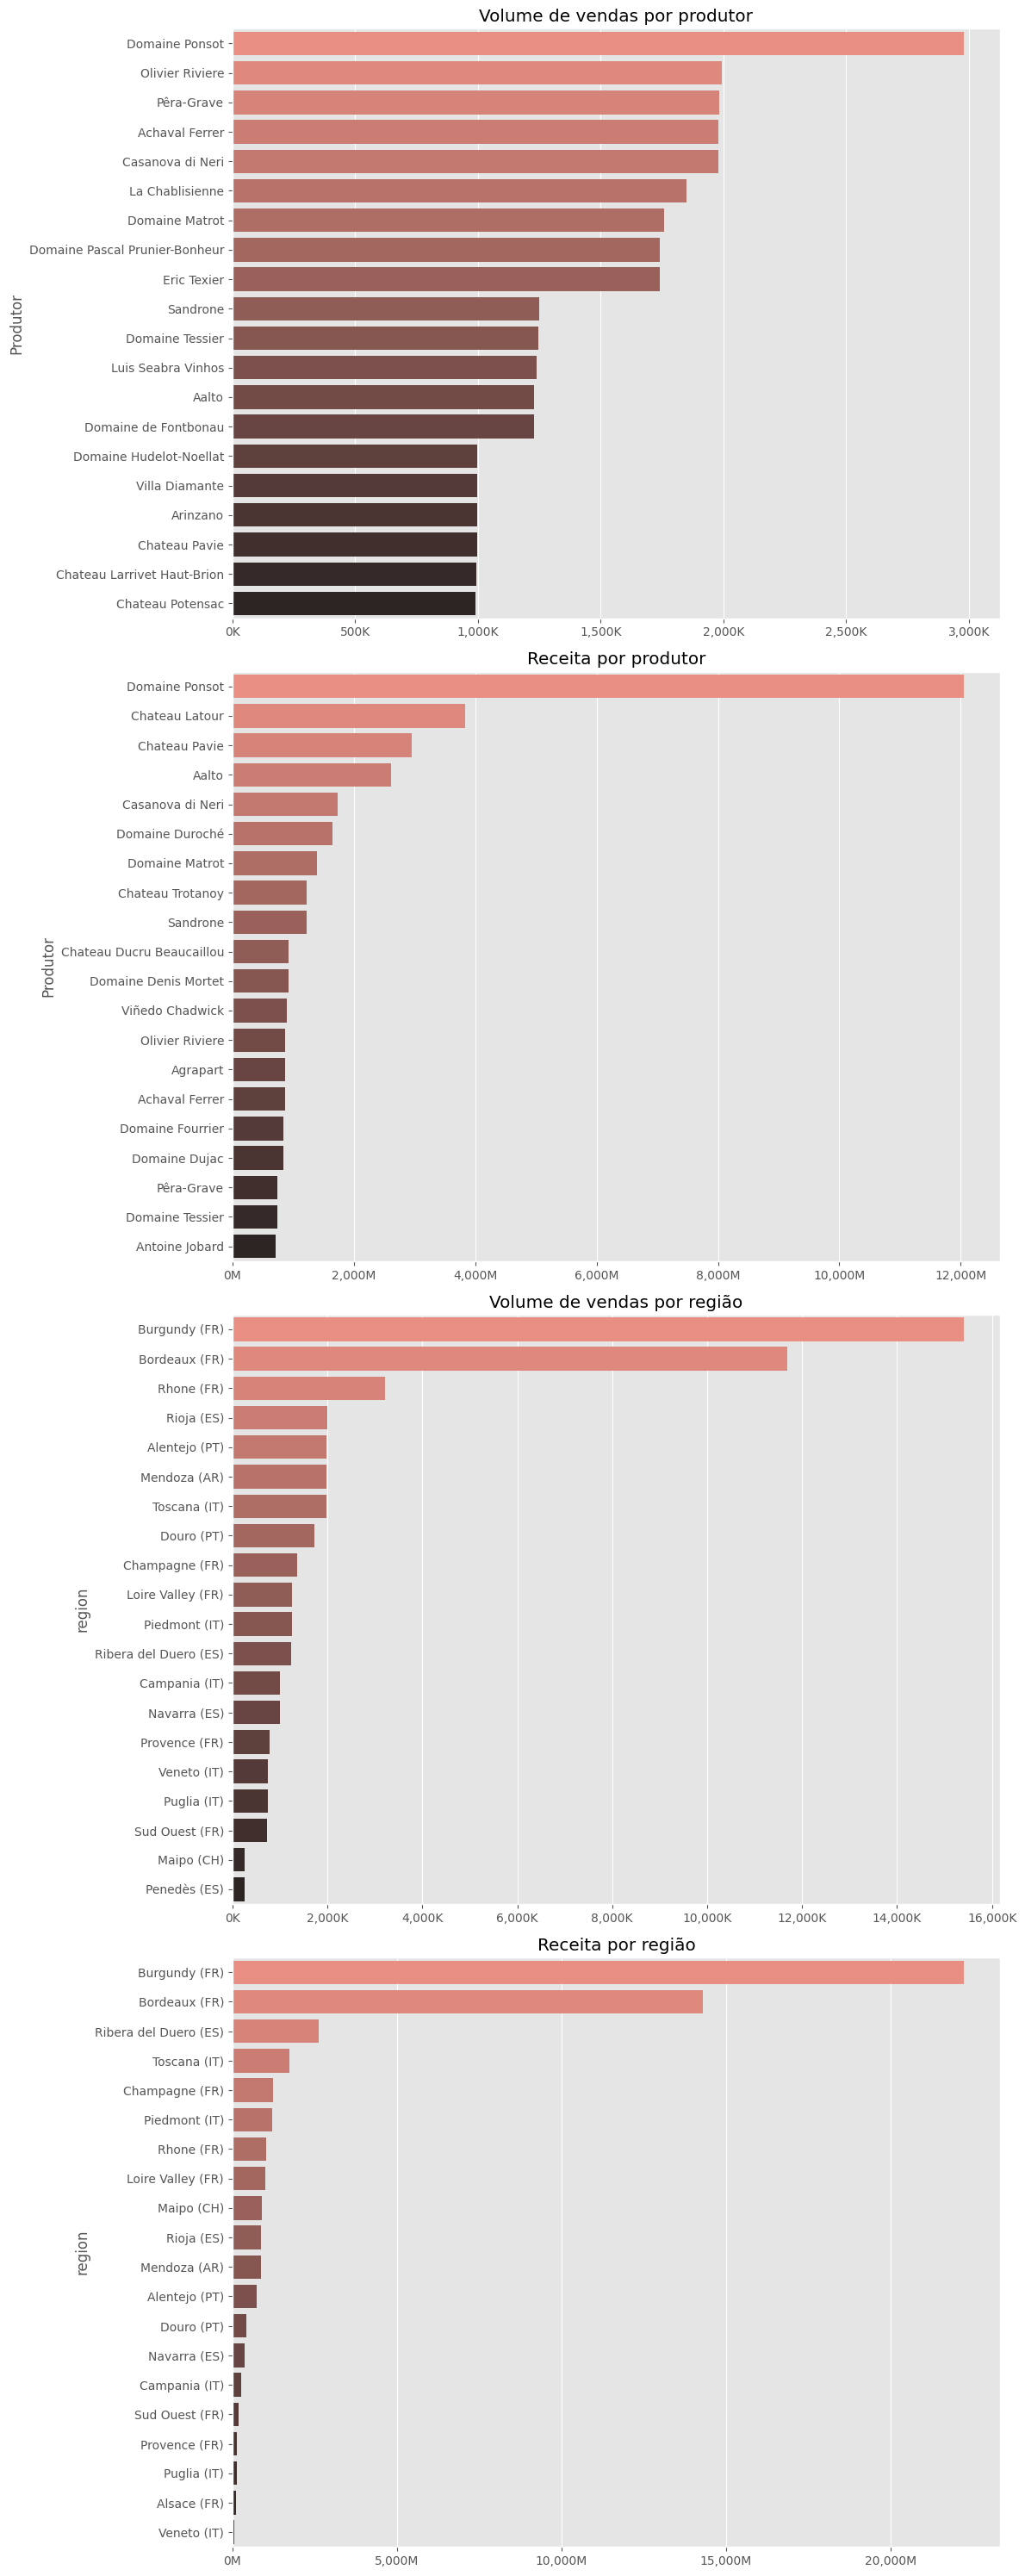

In [ ]:
sales_by_producer = store.groupby("producer")["sales"].sum().sort_values(ascending=False).iloc[0:20]
revenue_by_producer = store.groupby("producer")["sale_value_brl"].sum().sort_values(ascending=False).iloc[0:20]
sales_by_region = store.groupby("region")["sales"].sum().sort_values(ascending=False).iloc[0:20]
revenue_by_region = store.groupby("region")["sale_value_brl"].sum().sort_values(ascending=False).iloc[0:20]

fig, ax = plt.subplots(figsize=(12,30), nrows=4, ncols=1)
sns.barplot(y= sales_by_producer.index,x=sales_by_producer.values,orient="h", ax=ax[0], palette=wine_cp)
sns.barplot(y= revenue_by_producer.index,x=revenue_by_producer.values, orient="h", ax=ax[1], palette=wine_cp)
sns.barplot(y= sales_by_region.index,x=sales_by_region.values,orient="h", ax=ax[2], palette=wine_cp)
sns.barplot(y= revenue_by_region.index,x=revenue_by_region.values, orient="h", ax=ax[3], palette=wine_cp)

ax[0].set_title(TOP_PRODUCER_SALES)
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax[0].set_ylabel(LBL_PRODUCER)
ax[0].set_yticklabels( wrap_labels(ax[0].get_yticklabels()))


ax[1].set_title(TOP_PRODUCER_REVENUE)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_ylabel(LBL_PRODUCER)
ax[1].set_yticklabels( wrap_labels(ax[1].get_yticklabels()))


ax[2].set_title(TOP_REGION_SALES)
ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax[2].set_ylabel(LBL_REGION)
ax[2].set_yticklabels( wrap_labels(ax[2].get_yticklabels()))


ax[3].set_title(TOP_REGION_REVENUE)
ax[3].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax[3].set_ylabel(LBL_REGION)
ax[3].set_yticklabels( wrap_labels(ax[3].get_yticklabels()))

plt.tight_layout()


Como era de se esperar, as regiões de Burgundy e Bordeaux, ambas francesas, são as que estão no top das vendas, justamente por terem mais produtos. Já os vinhos Domaine Ponsot são os que lideram a lista de mais vendidos e os que geram mais receita. Sendo que nesta última, a diferença para o o segundo colocado é mais acentuada pelo fato de seus vinhos serem mais caros, na média, que os demais.

In [ ]:
#função para remover as bordas superior e direita do gráfico
def remove_right_top_spines(ax):
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)


In [ ]:
store.to_csv("wine_sales.csv", sep=';')

## 5. Fazendo as previsões
Para fazer as previsões futuras de vendas, será utilizada a biblioteca [prophet](https://facebook.github.io/prophet/) criada pela equipe de desenvolvimento do Facebook. Basicamente, esta biblioteca faz predições futuras a partir de um conjunto de dados que deverá conter duas colunas:
* `ds`: coluna do tipo data;
* `y`: coluna numérica, representa as medidas serão preditas.

Em nosso caso, a coluna `y` será dada pela na coluna `sales`. Vamos agora criar nosso dataset de previsão e vendas:

In [20]:
# preparando o dataset
df_ts=store.groupby('date',as_index=False)['sales'].sum()
df_ts['date'] = pd.to_datetime(df_ts['date'], format="%Y-%m-%d")
df_ts.index = pd.to_datetime(df_ts['date'], format="%Y-%m-%d")
df_ts.drop('date', axis=1, inplace=True)

# nomeando corretamente
df_ts = df_ts.reset_index()
df_ts.columns = ['ds', 'y']
df_ts.head()

ds      y
0 2018-01-01  43432
1 2018-01-02  43181
2 2018-01-03  43298
3 2018-01-04  42216
4 2018-01-05  42001

A primeira coisa que temos de fazer é verificar se nossa série temporal é **estacionária**. Uma série dita estacionária é aquela em que, embora apresente oscilações sazonais,  suas propriedades estatísticas, tais como média, variância e covariância não variam ao longo do tempo. Uma série estacionária apresenta um gráfico como este abaixo:
<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png">
</center>

Embora o pacote *Prohpet* consiga trabalhar com séries não estacionárias, seu desempenho é melhor com as estacionárias.
###5.1 Verificando se nossa série temporal de venda de vinhos é estacionária.
Para verificar se esta série em que estamos trabalhando é estacionária lançaremos mão de uma teste estatístico denominada de **Augmented Dickey-Fuller (ADF)**. Nestes teste examinamos duas possíveis hipóteses:
* A hipótese nula ($H_0$) é que a série **não é estacionária**, ou seja, apresenta modificações em suas medidas estatísticas ao longo do tempo.
* A hipótese alternativa($H_a$)  é de que a série **é  estacionária**.

Como em todo teste estatístico, o ADF gera um valor-p, que é verificado contra um valor de significância preestabelecido, representado pela letra grega "alfa" α. Os valores mais comuns de α são 0,01, 0,05 e 0,1; Se o valor-p < α então a hipótese nula é rejeitada, ou seja, podemos considerar a série como estacionária. Se valor-p > α, então não se rejeita a hipótese nula, o que quer dizer que a evidência de que a série é estacionária não é forte o suficiente.  
No jargão estatístico se rejeitamos $H_0$ e ela é verdadeira, então dizemos ocorre um erro tipo I. Agora se não rejeitamos $H_0$ e ela é falsa, dizemos que ocorre um erro do tipo II. Um valor de α baixo reduz as chances de erro tipo I, mas aumenta as chances de erro tipo II. Portanto, deve-se levar em conta qual tipo de erro é mais danoso ao escolhermos o valor de α. Se o primeiro erro for mais grave, devemos pegar um valor baixo, mas se o segundo for mais grave, devemos utilizar um α maior.  
Como o Prophet trabalha melhor com série estacionária convém reduzir o risco de tratar uma série não estacionária como se fosse estacionária, incorrendo em um erro tipo I. Assim iremos trabalhar com um valor de 0,01 para α e rejeitaremos a hipótese nula se valor-p for menor que isso.

In [32]:
# importanto o pacote
from statsmodels.tsa.stattools import adfuller
# extraindo os valores
X = df_ts.y

# aplicando o ADF e imprimindo os resultados.
result = adfuller(X)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -2.3601
P Value: 0.1533303754
Critical Values:
	1%: -3.4365
	5%: -2.8642
	10%: -2.5682


Como o valor-p de 0,153 é maior que nosso α, nós não rejeitaremos a hipótese nula e trateremos esta série como não estacionária. Porém existem técnicas para deixá-la aproximadamente como estacionária. Antes disso, porém vamos verificar como a ferramenta Prophet se comporta ao utilizar-se de séries não estacionárias..

### 5.2 Prevendo as vendas de vinhos sobre esta série como está.
Já foi dito anteriormente que o Prophet consegue trabalhar com séries. Então vamos fazer as previsões em cima deste série e depois comparar o desempenho desta com o obtido ao trabalhar com a série transformada. Antes disso, vamos criar algums métodos para visualizarmos as medidas:

In [25]:
# definindo a função
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower',
                                'yhat_upper']].join(historical.set_index('ds'))

def calculate_forecast_errors(df_ts, prediction_size):

  df = df_ts.copy()
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]

  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return{'MAPE': error_mean('p'), 'MAE': error_mean('e')}



Agora sim, iremos fazer as previsões Para isso vamos dividir o conjunto de dados em treino em teste, tal como fazemos com qualquer modelo de *machine learning*. Para a divisão iremos separar os últimos 30 dias como teste e o restante como treino.

In [22]:
# definindo o tamanho da previsão para trinta dias
prediction_size = 30
train_df = df_ts[:-prediction_size] #retira do conjunto de treino os dados dos últimos 30 dias, que ficarão para teste


In [23]:
## Fazendo as previsões
# instantiating the model
b = Prophet()

# training the model
b.fit(train_df)

# make predictions
future = b.make_future_dataframe(periods=prediction_size)

forecast = b.predict(future)

forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdg5g19yn/g8_d2gh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdg5g19yn/vs962onj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43551', 'data', 'file=/tmp/tmpdg5g19yn/g8_d2gh2.json', 'init=/tmp/tmpdg5g19yn/vs962onj.json', 'output', 'file=/tmp/tmpdg5g19yn/prophet_modelztm7odri/prophet_model-20231026020307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2018-01-01  45499.039179  40750.527800  43949.237494  45499.039179   
1 2018-01-02  45498.081259  41143.660725  44297.960538  45498.081259   
2 2018-01-03  45497.123338  41461.068556  44665.455644  45497.123338   
3 2018-01-04  45496.165418  41890.680056  44996.368628  45496.165418   
4 2018-01-05  45495.207497  42661.796410  45736.089790  45495.207497   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  45499.039179    -3083.562908          -3083.562908          -3083.562908   
1  45498.081259    -2800.707332          -2800.707332          -2800.707332   
2  45497.123338    -2461.477525          -2461.477525          -2461.477525   
3  45496.165418    -1982.107934          -1982.107934          -1982.107934   
4  45495.207497    -1340.649767          -1340.649767          -1340.649767   

       weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
0 -899.856816   -899.856816   -899.856816 -2183.706092  -2183.706092   
1 -616.589827   -616.589827   -616.589827 -2184.117505  -2184.117505   
2 -275.759820   -275.759820   -275.759820 -2185.717704  -2185.717704   
3  206.207569    206.207569    206.207569 -2188.315503  -2188.315503   
4  851.039599    851.039599    851.039599 -2191.689366  -2191.689366   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  -2183.706092                   0.0                         0.0   
1  -2184.117505                   0.0                         0.0   
2  -2185.717704                   0.0                         0.0   
3  -2188.315503                   0.0                         0.0   
4  -2191.689366                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  42415.476271  
1                         0.0  42697.373927  
2                         0.0  43035.645813  
3                         0.0  43514.057483  
4                         0.0  44154.557731

O dataframe retornado pela ferramenta *prophet* traz diversas informações, das quais as mais importantes são o `yhat` que são os valores previstos, `yhat_lower` e `yhat_upper` que delimitam um limite de incerteza da previsão. Vamos agora visualizar a previsão:

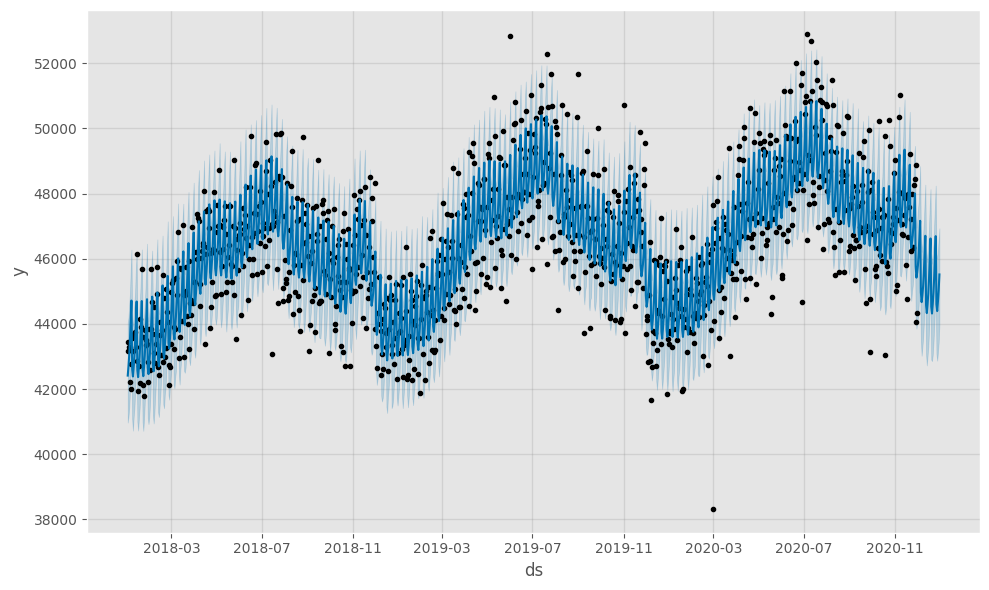

In [ ]:
# plotando as previsões
b.plot(forecast).savefig('forecast_non_stationary.png')

O *Prophet* também permite visualizar gráficos com tendências gerais, semanais e anuais como se pode verificar abaixo:

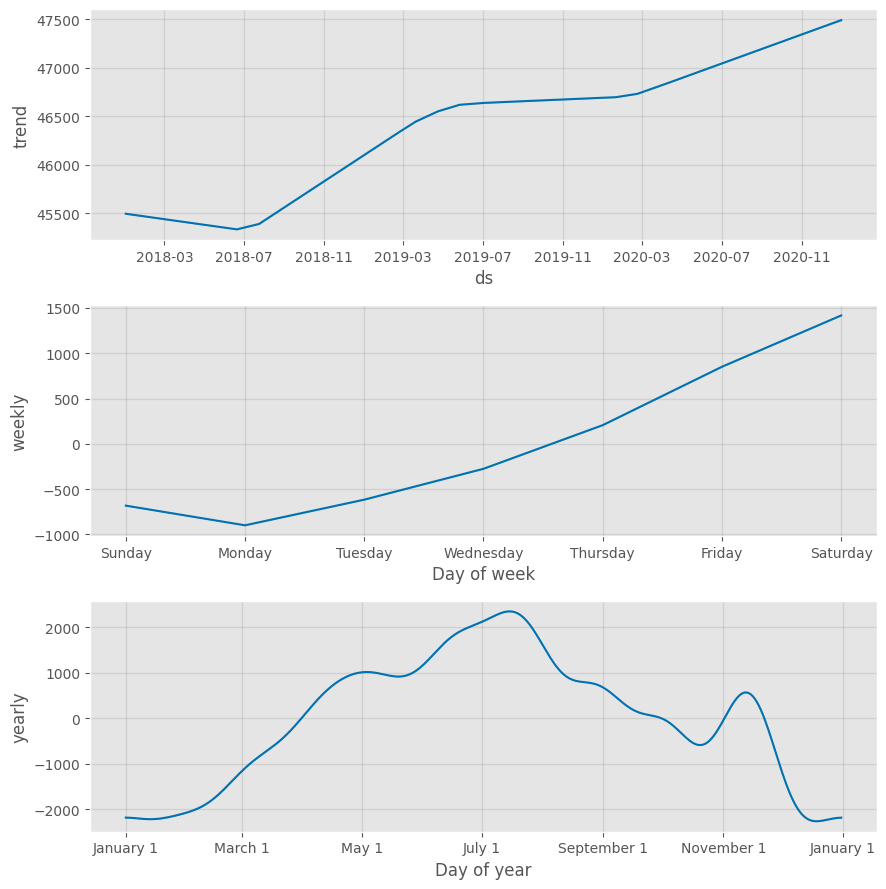

In [ ]:
# plotando componentes
b.plot_components(forecast).savefig('non_st_components.png')

Chegou a hora de verificar o nível de confiabilidade de nossas previsões. Para isto vamos lançar mão de duas das mais utilizadas medidas de desempenho para regressão, que são:
* Mean Absolute Error: (MAE) que traz o valor médio dos erros absolutos nas previsões, ou seja, a soma das distâncias entre os valores reais e os valores previstos dividida pelo número de previsões.;
* Mean Absolute Percentage Error (MAPE): traz a média dos erros relativos das previsões, ou seja, a soma dos erros relativos divida pela quantidade de previsões, sendo que erro relativo é igual ao erro absoluto dividido pelo valor real.

In [26]:
# imprimindo o MAPE e MAE
cmp_df = make_comparison_dataframe(df_ts, forecast)

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
  print(err_name, err_value)

MAPE 2.250270777737541
MAE 1000.8375246951182


Com um pouco mais de 2%, em termos relativos o erro não parece grande, entretanto em termos absolutos um erro da ordem de 1000 é um tanto elevado. Vamos visualizar as diferenças entre as previsões e os valores reais:

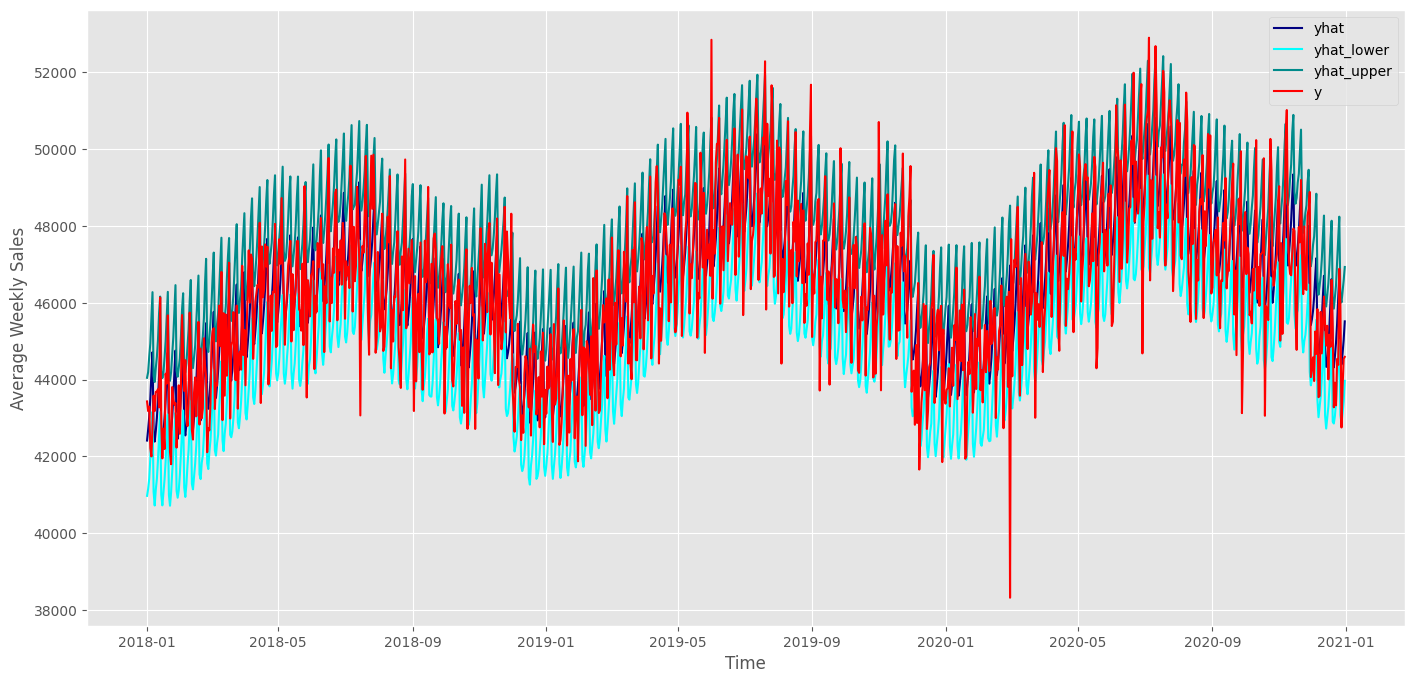

In [ ]:
# visualizando os resultados
fig, ax = plt.subplots(figsize=(17,8))

#plt.plot(cmp_df['yhat'])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
#plt.plot(cmp_df['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df['yhat'], label='yhat', color="Navy")
ax.plot(cmp_df['yhat_lower'], label='yhat_lower', color="cyan")
ax.plot(cmp_df['yhat_upper'], label='yhat_upper', color="DarkCyan")
ax.plot(cmp_df['y'], label='y', color="red")
ax.legend()
plt.savefig('non_st_yhat.png')
plt.show()

### 5.3. Transformando a série temporal em estacionária.
Para transformar uma série não estacionária em estacionária, primeiro vamos transformar os valores de `y` em seus respectivos logaritmos:

In [28]:
# preparando os dados
df_ts.index = pd.to_datetime(df_ts['ds'], format="%Y-%m-%d")
df_ts.drop('ds', axis=1, inplace=True)
df_ts.head()

y
ds               
2018-01-01  43432
2018-01-02  43181
2018-01-03  43298
2018-01-04  42216
2018-01-05  42001

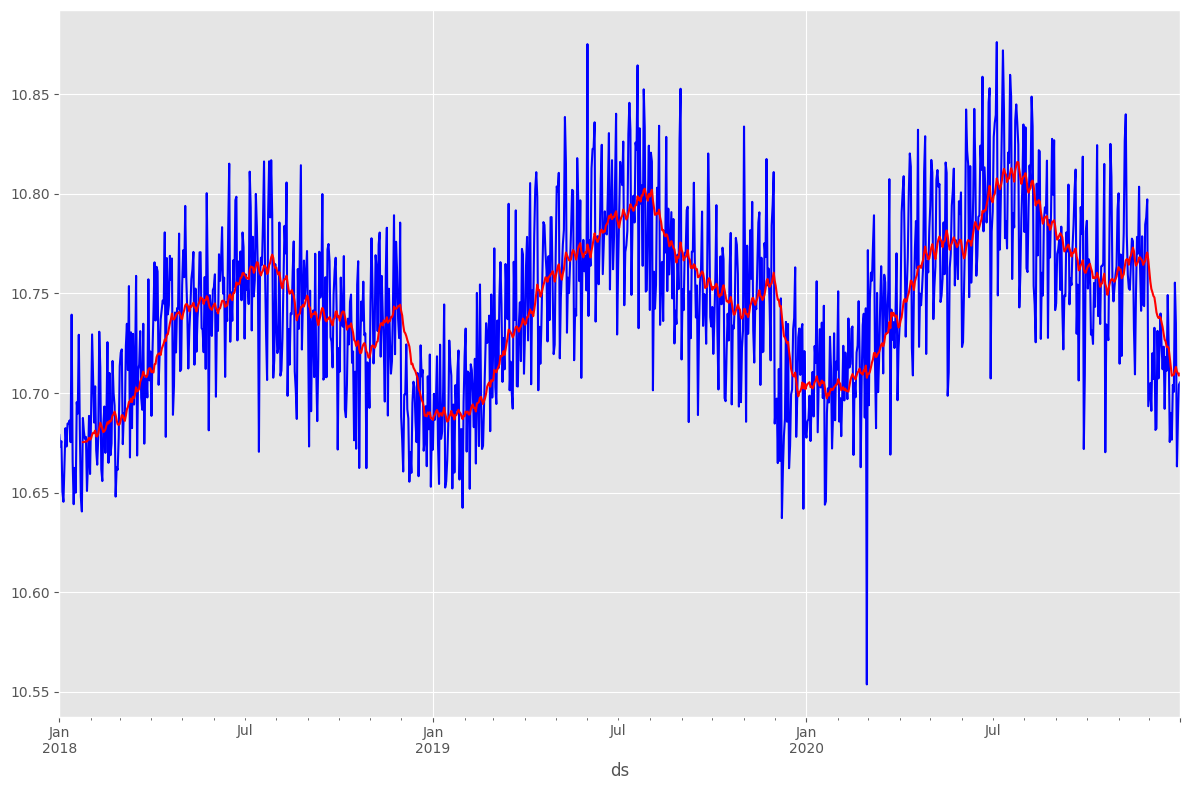

In [29]:
# aplicando o log
df_log = np.log(df_ts)
ma_log = df_log.rolling(24).mean() #Obtendo a média móvel dos últimos 24 dias

fig, ax = plt.subplots(figsize=(12,8))
df_log.plot(ax=ax, color="b",legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

A seguir, vamos subtrair a média móvel nos dados:

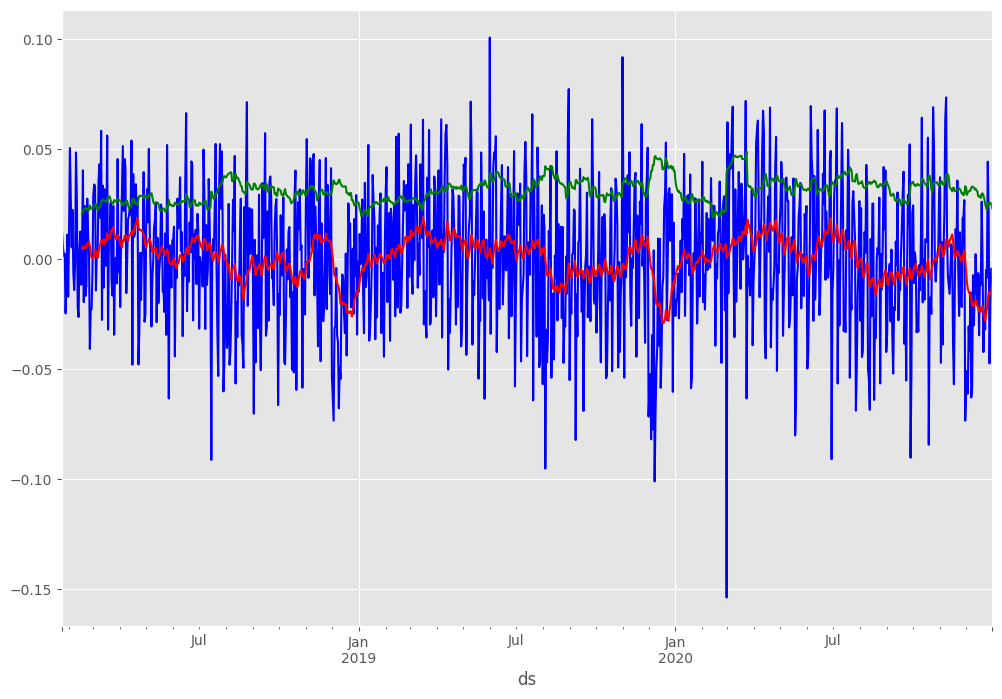

In [30]:
# subtraindo a média do log nos dados
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(24).mean()
std_sub = df_sub.rolling(24).std()

fig, ax = plt.subplots(figsize=(12,8))
df_sub.plot(ax=ax, color='b', legend=False)
ma_sub.plot(ax=ax, color='r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show();

Pelo gráfico acima, percebe-se que a série aparenta ser estacionária, mas vamos agora aplicar novamente o teste ADF para termos certeza disto:

In [33]:
# repetindo o ADF
X_sub = df_sub.y.values

# aplicando o ADF e imprimindo os resultados
result_sub = adfuller(X_sub)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result_sub[0]))
print('P Value: {:.10f}'.format(result_sub[1]))
print('Critical Values:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -5.6436
P Value: 0.0000010231
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


Agora o valor-p está muito abaixo do valor α de 0,01. Com isso, podemos tranquilamente rejeitar a hipótese nula e assumir que esta série é estacionária.

### 5.4 Fazendo previsões em cima da série estacionária

In [36]:
# definindo o tamanho da previsão
prediction_size = 30
train_df = df_log[:-prediction_size]

In [37]:
# transformando no formato do Prophet
df_log.reset_index(inplace=True)

# instanciando o modelo
m = Prophet()

# treinando o modelo
m.fit(train_df)

# fazer previsões
future = m.make_future_dataframe(periods=prediction_size)

forecast = m.predict(future)

forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdg5g19yn/3a4_7z13.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdg5g19yn/xi7402n3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90267', 'data', 'file=/tmp/tmpdg5g19yn/3a4_7z13.json', 'init=/tmp/tmpdg5g19yn/xi7402n3.json', 'output', 'file=/tmp/tmpdg5g19yn/prophet_model_cuo5vka/prophet_model-20231026025530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:55:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:55:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2018-01-01  10.727446   10.629045   10.695426    10.727446    10.727446   
1 2018-01-02  10.727406   10.631961   10.700568    10.727406    10.727406   
2 2018-01-03  10.727365   10.637867   10.707736    10.727365    10.727365   
3 2018-01-04  10.727325   10.650049   10.714320    10.727325    10.727325   
4 2018-01-05  10.727285   10.662138   10.729571    10.727285    10.727285   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.068235             -0.068235             -0.068235 -0.019148   
1       -0.062152             -0.062152             -0.062152 -0.012997   
2       -0.054845             -0.054845             -0.054845 -0.005593   
3       -0.044589             -0.044589             -0.044589  0.004785   
4       -0.031244             -0.031244             -0.031244  0.018271   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.019148     -0.019148 -0.049088     -0.049088     -0.049088   
1     -0.012997     -0.012997 -0.049155     -0.049155     -0.049155   
2     -0.005593     -0.005593 -0.049252     -0.049252     -0.049252   
3      0.004785      0.004785 -0.049374     -0.049374     -0.049374   
4      0.018271      0.018271 -0.049515     -0.049515     -0.049515   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  10.659210  
1                         0.0  10.665254  
2                         0.0  10.672520  
3                         0.0  10.682736  
4                         0.0  10.696041

Visualizando o gráfico da previsão e o dos componentes:

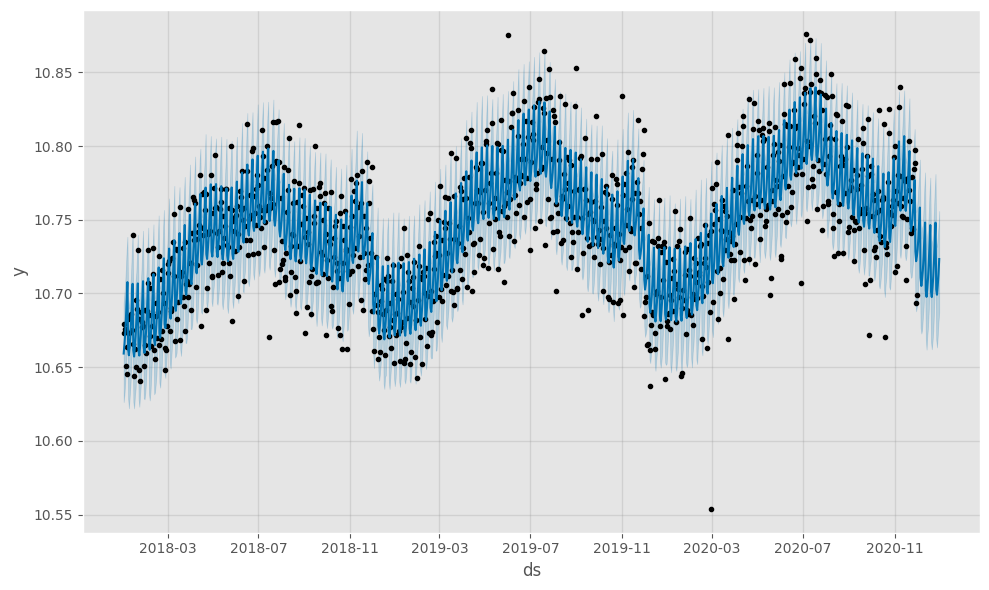

In [ ]:
# plotando as previsões
m.plot(forecast).savefig('forecast_stationary.png')

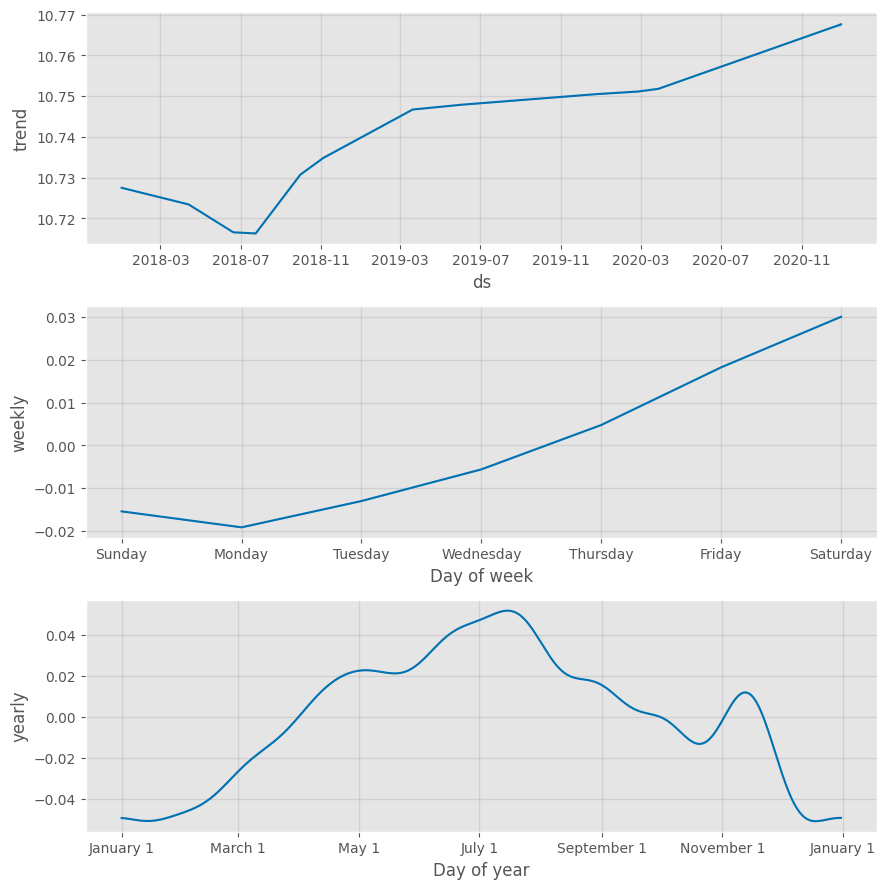

In [ ]:
# plotando componentes
m.plot_components(forecast).savefig('st_components.png')

Obtendo as medidas de desempenho:


In [ ]:
# imprimindo o MAPE e MAE
cmp_df = make_comparison_dataframe(df_log, forecast)

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
  print(err_name, err_value)

MAPE 0.20132798086935053
MAE 0.021549251650755726


Vejam como as medidas de desempenho melhoraram significativamente quando transformamos nossa série original em uma série estacionária.


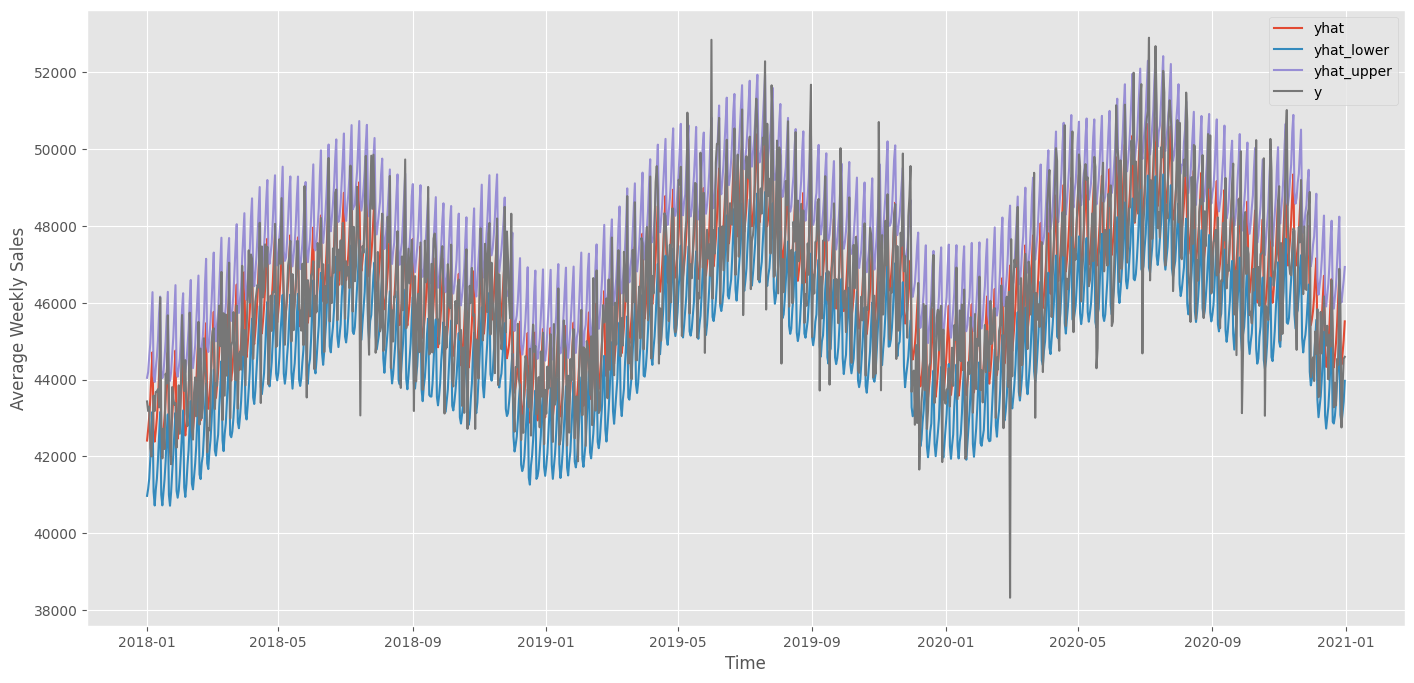

In [ ]:
# visualizando os resultados
fig, ax = plt.subplots(figsize=(17,8))


plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df['yhat'], label='yhat')
ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(cmp_df['y'], label='y')
ax.legend()
plt.savefig('non_st_yhat.png')

plt.show()

´Como nós efetuamos uma transformação logarítmica para chegarmos a uma série estacionária teremos de retornar à escala original, utilizando uma transformação exponencial, que é a inversa à logarítmica:

* Data;
* Previsão do Prophet (yhat)
* Volume de vendas em escala logarítmica
* Volume de vendas na escala real

In [ ]:
# criando um dataset completo
df_final = forecast[['ds', 'yhat']].copy()
df_final['TotalSalesLog'] = df_log['y']
df_final['TotalSales'] = np.exp(df_final['TotalSalesLog'].values)
df_final['TotalSalesPred'] = np.exp(df_final['yhat'].values)

df_final.head()

ds       yhat  TotalSalesLog  TotalSales  TotalSalesPred
0 2018-01-01  10.659221      10.678952     43432.0    42583.456363
1 2018-01-02  10.665265      10.673156     43181.0    42841.609876
2 2018-01-03  10.672533      10.675862     43298.0    43154.096535
3 2018-01-04  10.682748      10.650555     42216.0    43597.210883
4 2018-01-05  10.696054      10.645449     42001.0    44181.167133


Por fim, vamos plotar um gráfico para visualizar a diferença entre os valores reais e os previstos:



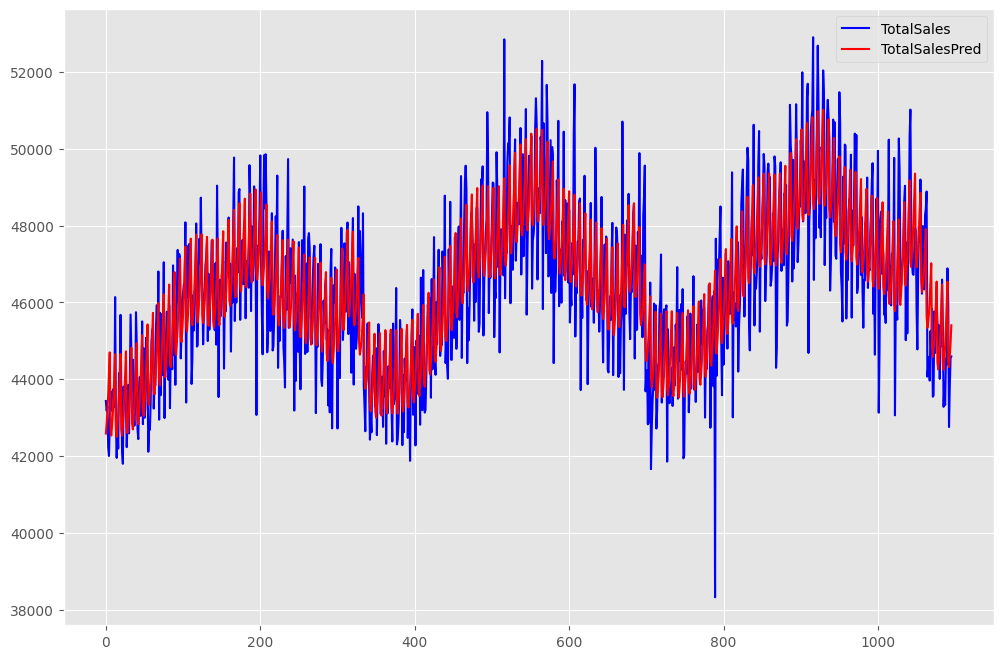

In [ ]:
# plotting predictions vs reality
fig, ax = plt.subplots(figsize=(12,8))
df_final['TotalSales'].plot(ax=ax, color='b', legend=(LBL_TOTAL_SALES))
df_final['TotalSalesPred'].plot(ax=ax, color='r', legend={LBL_PREDICTED})
plt.savefig('st_yhat.png')
plt.show()


## 6. Conclusões
Neste projeto buscou-se modelar uma ferramenta para a previsão de vendas de uma loja de vinhos e foi constatado que a tarefa de administrar os estoques de uma revendedora de vinhos é uma tarefa bastante complexa que requer estratégias de longo e de curto prazo, e que e uma ferramenta para predição de vendas usando técnicas de aprendizado de máquina pode ajudar bastante nesta tarefa. A ferramenta que utilizamos para fazer as previsões foi o *Prophet*, desenvolvida pela equipe de desenvolvimento do Facebook.  
A série temporal utilizada para nossa previsão não era estacionária, mas foi feita uma transformação logarítmica que a transformou em estacionária, daí foi feita comparação da qualidade das previsões nas duas séries, o que mostrou que o desempenho do *Prophet* foi incomparavelmente melhor quando a série é estacionária.

